## Run data pipeline
Returns an aggegrated df to work with

In [1]:
# Only for Wesley %run "./Data"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Copy this cell to every new version of Main
#import dataframe
df_hourly = pd.read_parquet('/home/joelva/code/pgt-group-3/data/raw/Complete_Set/HECTORdataAggregated_Hourly_20240331152619.parquet')

# Print the number of rows
print(f"Number of rows in the file: {len(df_hourly)}")

Number of rows in the file: 2667


## Import utilities
Import custom function

In [4]:
#Copy this cell to every new version of Main
%run "Utilities.ipynb" 

In [6]:
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [7]:
#Copy this cell to every new version of Main
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df_hourly

,Vdatetime,datetime,BatSOC,ThrottlePerc,RearAxle1,H2Weight,MotorRPM,MotorTorque,MotorTemp,BattOutputPower,...,TotalPowerDraw,DayOfWeek,AirTemp,Is_Friday,Is_Monday,Is_Saturday,Is_Sunday,Is_Thursday,Is_Tuesday,Is_Wednesday
0,2022-08-01 04,2022-08-01 04:59:59.880000+00:00,87.733572,94.314217,7108.281063,6241.840427,32.226553,251.142921,40.973181,17290.052132,...,13713.046695,Monday,20.6,0,1,0,0,0,0,0
1,2022-08-01 05,2022-08-01 05:59:59.990000+00:00,81.852431,68.168056,8580.659722,6637.344792,10.728542,119.177014,50.915306,15929.268472,...,9444.155245,Monday,20.6,0,1,0,0,0,0,0
2,2022-08-01 06,2022-08-01 06:59:59.870000+00:00,54.056532,98.022640,7776.109452,5644.733940,37.581013,235.988194,56.864547,16360.531741,...,12075.898738,Monday,20.6,0,1,0,0,0,0,0
3,2022-08-01 07,2022-08-01 07:59:59.820000+00:00,46.348187,213.243523,8328.226385,6329.168194,212.520287,445.930969,72.886717,18460.976244,...,40680.984837,Monday,20.6,0,1,0,0,0,0,0
4,2022-08-01 08,2022-08-01 08:59:59.940000+00:00,24.638125,47.125000,3179.993056,2554.907153,28.368542,71.331042,70.815041,-16121.872074,...,5412.054734,Monday,20.6,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,2023-04-29 12,2023-04-29 12:59:59.840000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0
2663,2023-04-29 13,2023-04-29 13:59:59.830000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0
2664,2023-04-29 14,2023-04-29 14:59:59.840000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0
2665,2023-04-29 15,2023-04-29 15:59:59.920000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0


In [9]:
#check min/max values and number of rows
import pandas as pd

min_datetime = df_hourly['Vdatetime'].min()
max_datetime = df_hourly['Vdatetime'].max()

print(f"Minimum datetime: {min_datetime}")
print(f"Maximum datetime: {max_datetime}")

df_hourly.shape
print(df_hourly.shape)

Minimum datetime: 2022-08-01 04
Maximum datetime: 2023-04-29 16
(2667, 23)


In [10]:
#Copy this cell to every new version of Main 
# List data types of each column
dtypes_result = df_hourly.dtypes

# Display descriptive statistics for numerical columns
describe_result = df_hourly.describe()

# Combine both results in one code snippet
combined_result = pd.concat([dtypes_result, describe_result], axis=1, keys=['Data Types', 'Statistics'])

# Display the combined result
print(combined_result)


                              Data Types   Statistics               \
                                       0       BatSOC ThrottlePerc   
Vdatetime                         object          NaN          NaN   
datetime         datetime64[us, Etc/UTC]          NaN          NaN   
BatSOC                           float64          NaN          NaN   
ThrottlePerc                     float64          NaN          NaN   
RearAxle1                        float64          NaN          NaN   
H2Weight                         float64          NaN          NaN   
MotorRPM                         float64          NaN          NaN   
MotorTorque                      float64          NaN          NaN   
MotorTemp                        float64          NaN          NaN   
BattOutputPower                  float64          NaN          NaN   
MotorPowerDraw                   float64          NaN          NaN   
TotalFCPower                     float64          NaN          NaN   
ActualSpeed         

In [11]:
 # Methode 1: Gebruik isna() of isnull() en dan sum()
aantal_nan = df_hourly.isna().sum()

# Methode 2: Gebruik any() om te controleren of er minstens één NaN-waarde is
heeft_nan = df_hourly.isna().any().any()

# Methode 3: Tel het aantal NaN-waarden in het hele DataFrame
totaal_aantal_nan = df_hourly.isna().sum().sum()

# Uitvoer resultaten
print("Aantal NaN per kolom:")
print(aantal_nan)
print("\nHeeft DataFrame NaN-waarden?")
print(heeft_nan)
print("\nTotaal aantal NaN-waarden in DataFrame:")
print(totaal_aantal_nan)

Aantal NaN per kolom:
Vdatetime           0
datetime            0
BatSOC              6
ThrottlePerc        6
RearAxle1           6
H2Weight            6
MotorRPM            6
MotorTorque         6
MotorTemp           0
BattOutputPower     6
MotorPowerDraw      6
TotalFCPower       13
ActualSpeed         6
TotalPowerDraw      6
DayOfWeek           0
AirTemp             0
Is_Friday           0
Is_Monday           0
Is_Saturday         0
Is_Sunday           0
Is_Thursday         0
Is_Tuesday          0
Is_Wednesday        0
dtype: int64

Heeft DataFrame NaN-waarden?
True

Totaal aantal NaN-waarden in DataFrame:
73


In [19]:
df = df_hourly
df = df.dropna()

column_names = df.columns.tolist()

# This will print the list of column names
print(column_names)

['Vdatetime', 'datetime', 'BatSOC', 'ThrottlePerc', 'RearAxle1', 'H2Weight', 'MotorRPM', 'MotorTorque', 'MotorTemp', 'BattOutputPower', 'MotorPowerDraw', 'TotalFCPower', 'ActualSpeed', 'TotalPowerDraw', 'DayOfWeek', 'AirTemp', 'Is_Friday', 'Is_Monday', 'Is_Saturday', 'Is_Sunday', 'Is_Thursday', 'Is_Tuesday', 'Is_Wednesday']


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#features to keep "BatSOC", "ThrottlePerc", "RearAxle1", "H2Weight", "MotorRPM", "MotorTemp", "BattOutputPower", "TotalFCPower", "MotorPowerDraw", "ActualSpeed", "TotalPowerDraw", "AirTemp"

# Verwijder niet-noodzakelijke kolommen en splits de data
X = df.drop(['Vdatetime','datetime', 'TotalPowerDraw', 'DayOfWeek','Is_Friday', 'Is_Monday', 'Is_Saturday', 'Is_Sunday', 'Is_Thursday', 'Is_Tuesday', 'Is_Wednesday'], axis=1)  # Veronderstel dat deze kolommen zijn verwijderd
y = df['TotalPowerDraw']

# Normaliseer de data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Splits de data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train

,BatSOC,ThrottlePerc,RearAxle1,H2Weight,MotorRPM,MotorTorque,MotorTemp,BattOutputPower,MotorPowerDraw,TotalFCPower,ActualSpeed,AirTemp
2106,99.999236,0.000000,0.000000,0.000000,0.000000,0.000000,76.000000,651.265764,0.000000,-0.238787,0.000000,6.8
904,31.835833,103.503889,4466.062500,9560.479931,83.425625,176.707917,65.190895,-7877.450000,12639.898138,24421.511971,14.599484,9.3
2261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,-0.250000,0.000000,7.2
1146,78.309220,225.814947,9052.834555,4481.356732,165.405345,688.217551,72.714838,6503.653141,40951.706442,39655.554812,28.945935,15.2
1818,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,615.024722,0.000000,-0.243302,0.000000,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1651,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,624.645992,0.000000,-0.191370,0.000000,6.6
1108,62.484306,150.230000,9404.493056,2078.658056,124.719375,313.520972,67.482431,4579.887292,21119.983306,24829.587248,21.825891,19.6
1143,36.026899,169.147612,5467.929198,10261.941147,145.617606,368.633121,83.046873,-19687.176289,28657.148831,53111.706106,25.483081,15.2
1307,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,654.519064,0.000000,-0.200809,0.000000,6.7


In [31]:
y

0       13713.046695
1        9444.155245
2       12075.898738
3       40680.984837
4        5412.054734
            ...     
2662        0.000000
2663        0.000000
2664        0.000000
2665        0.000000
2666        0.000000
Name: TotalPowerDraw, Length: 2654, dtype: float64

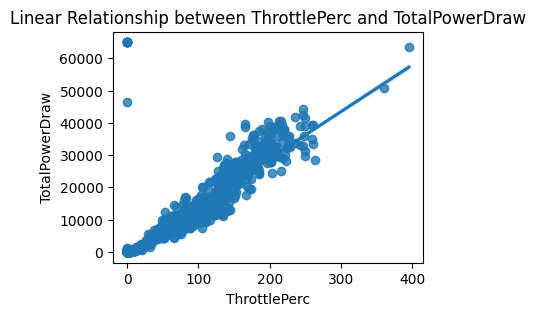

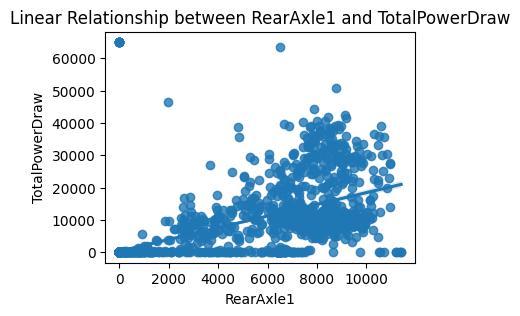

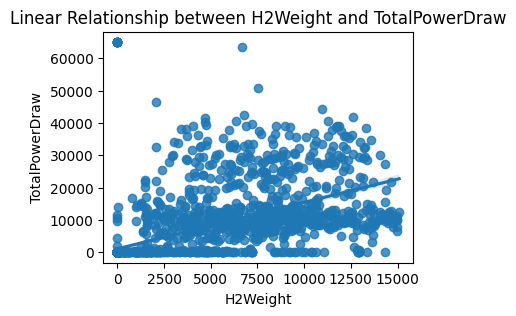

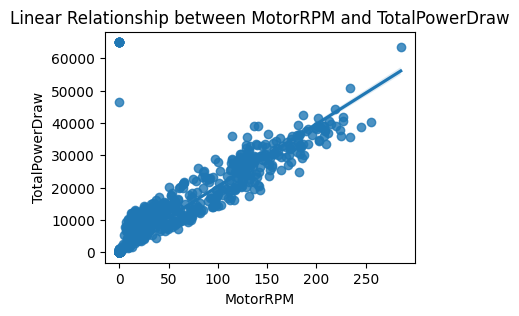

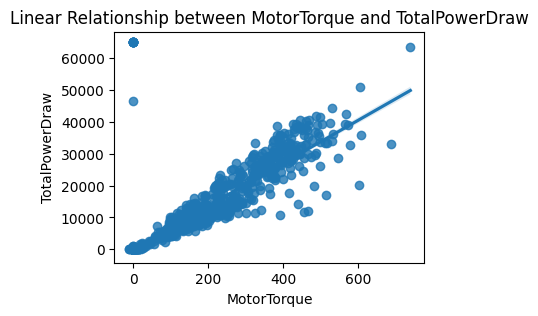

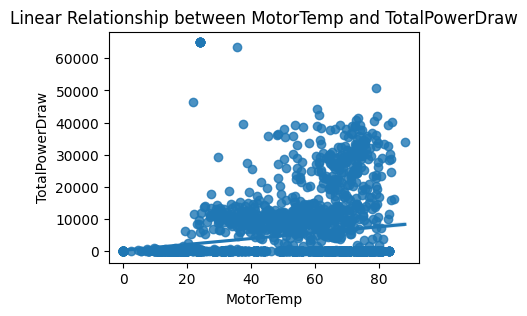

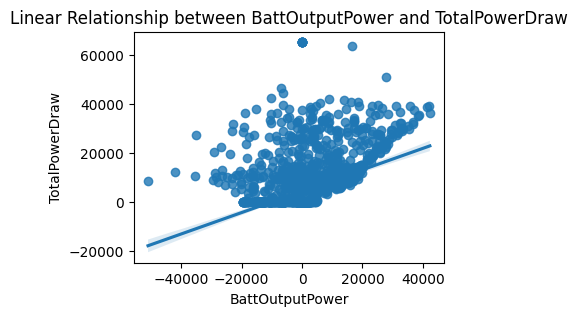

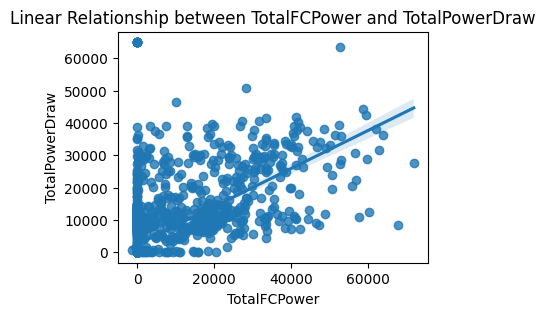

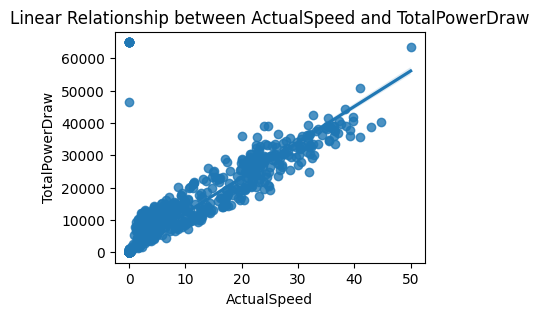

Plotting the linear relationship between Throttle Percentage and Total Power Draw...


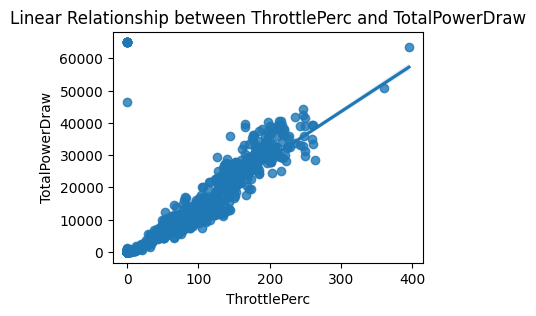

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


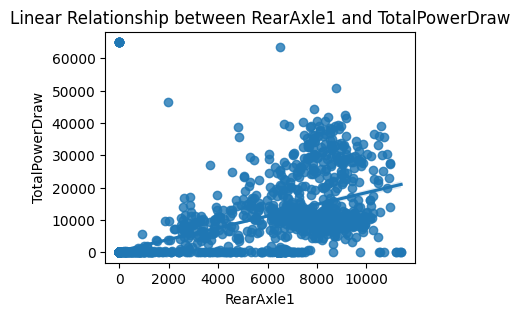

Plotting the linear relationship between Throttle Percentage and TotalPowerDraw...


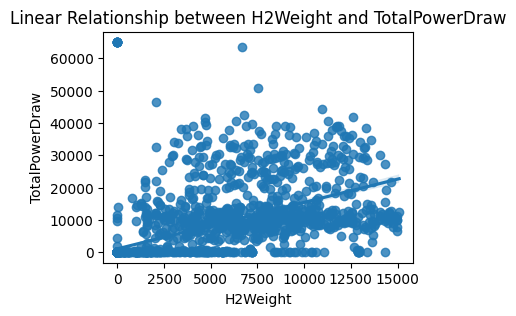

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


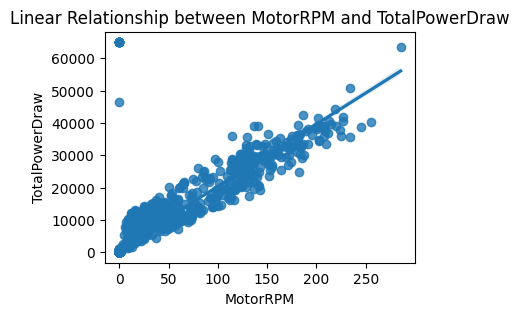

Plotting the linear relationship between Throttle Percentage and TotalPowerDraw...


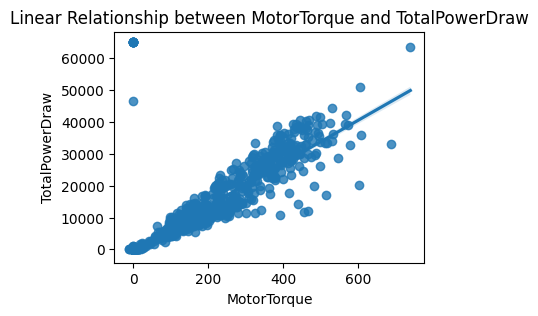

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


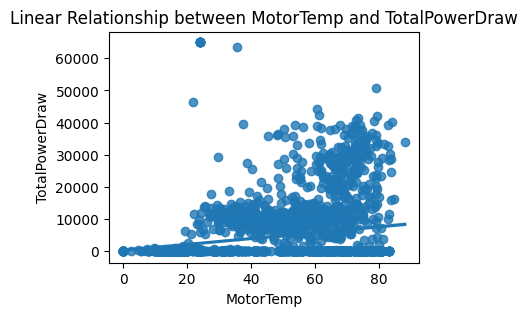

Plotting the linear relationship between Throttle Percentage and TotalPowerDraw..


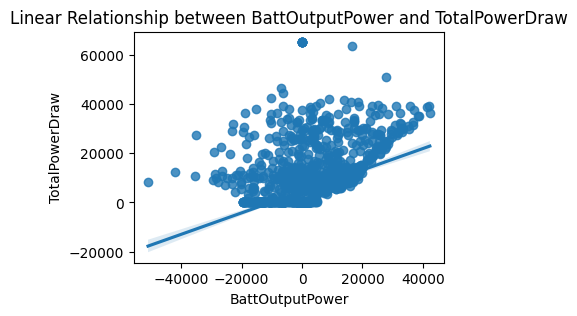

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


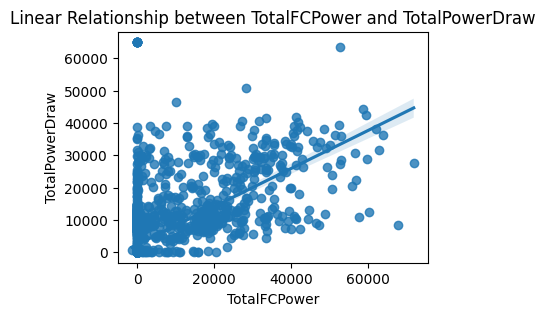

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


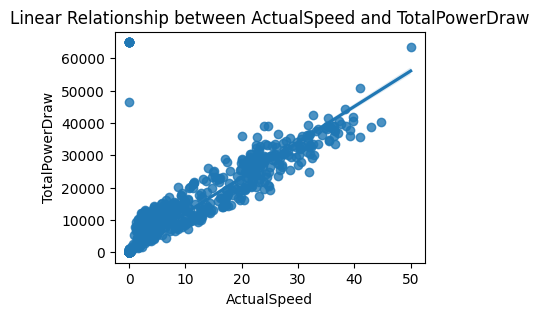

In [28]:
#check linear relationship,

def plot_linear_relationships(df, x_col, y_col, figsize=(4, 3)):
    """
    Plot the linear relationship between two columns from a DataFrame.
    
    - x_col: The name of the column to use as the x-axis.
    - y_col: The name of the column to use as the y-axis.
    - figsize: Tuple representing the figure size.
    """
    plt.figure(figsize=figsize)
    sns.regplot(x=x_col, y=y_col, data=df_hourly)
    plt.title(f'Linear Relationship between {x_col} and {y_col}')
    plt.show()

plot_linear_relationships(df, 'ThrottlePerc','TotalPowerDraw')
plot_linear_relationships(df, 'RearAxle1','TotalPowerDraw')
plot_linear_relationships(df, 'H2Weight','TotalPowerDraw')
plot_linear_relationships(df, 'MotorRPM','TotalPowerDraw')
plot_linear_relationships(df, 'MotorTorque','TotalPowerDraw')
plot_linear_relationships(df, 'MotorTemp','TotalPowerDraw')
plot_linear_relationships(df, 'BattOutputPower','TotalPowerDraw')
plot_linear_relationships(df, 'TotalFCPower','TotalPowerDraw')
plot_linear_relationships(df, 'ActualSpeed','TotalPowerDraw')

print("Plotting the linear relationship between Throttle Percentage and Total Power Draw...")
plot_linear_relationships(df, 'ThrottlePerc', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df, 'RearAxle1', 'TotalPowerDraw')

print("Plotting the linear relationship between Throttle Percentage and TotalPowerDraw...")
plot_linear_relationships(df, 'H2Weight', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df, 'MotorRPM', 'TotalPowerDraw')

print("Plotting the linear relationship between Throttle Percentage and TotalPowerDraw...")
plot_linear_relationships(df, 'MotorTorque', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df, 'MotorTemp', 'TotalPowerDraw')

print("Plotting the linear relationship between Throttle Percentage and TotalPowerDraw..")
plot_linear_relationships(df, 'BattOutputPower', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df, 'TotalFCPower', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df, 'ActualSpeed', 'TotalPowerDraw')


In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Assuming X_train and y_train are defined and aligned

# Make an instance of StandardScaler
scaler = StandardScaler()

# Scale the independent variables (X)
X_scaled = scaler.fit_transform(X_train)

# Add a constant for the intercept
X_scaled_with_const = sm.add_constant(X_scaled)

# Apply the OLS model
model = sm.OLS(y_train, X_scaled_with_const).fit()  # Use y_train to match X_train

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         TotalPowerDraw   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1049.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:35:35   Log-Likelihood:                -20416.
No. Observations:                2123   AIC:                         4.086e+04
Df Residuals:                    2111   BIC:                         4.092e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4479.9606     79.044     56.677      0.0

In [40]:
#Check num of rows , colums and type in the X_Scaled set and y set
print(X_scaled.shape)
print(type(X_scaled))
print(y.shape)
print(type(y))

(2123, 12)
<class 'numpy.ndarray'>
(2654,)
<class 'pandas.core.series.Series'>


In [35]:
#Check that X_scaled is scaled 
print(X_scaled)
#X is scaled
y
print(y)
#y is not scaled


[[ 0.92817912 -0.53783722 -0.664512   ... -0.37428604 -0.42237462
  -0.53172032]
 [-1.05507315  1.27093516  0.59556017 ...  2.05250726  1.57369099
  -0.18222057]
 [-1.98135449 -0.53783722 -0.664512   ... -0.37428715 -0.42237462
  -0.47580036]
 ...
 [-0.93313175  2.4180858   0.87823072 ...  4.90345645  3.06171429
   0.64259882]
 [ 0.92820134 -0.53783722 -0.664512   ... -0.37428226 -0.42237462
  -0.54570031]
 [ 0.92820134 -0.53783722 -0.664512   ... -0.37427386 -0.42237462
   0.02747927]]
0       13713.046695
1        9444.155245
2       12075.898738
3       40680.984837
4        5412.054734
            ...     
2662        0.000000
2663        0.000000
2664        0.000000
2665        0.000000
2666        0.000000
Name: TotalPowerDraw, Length: 2654, dtype: float64


END OF PREPROCESSING    

In [41]:
#check which format the dataset is
print(type(X_scaled))
print(type(y))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [42]:
#check which format the dataset is
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [49]:
# train a linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Coefficient of Determination (R^2): {r2}")

# Get the feature names
feature_names = X_train.columns

# Get the coefficients from the model
coefficients = model.coef_

# Pair each feature name with its corresponding coefficient
feature_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Print the feature names alongside their coefficients
print(feature_coefficients)

Mean Squared Error (MSE): 23759623.638500422
Coefficient of Determination (R^2): 0.7605742180849744
            Feature  Coefficient
0            BatSOC   -10.044323
1      ThrottlePerc    38.638911
2         RearAxle1    -0.026544
3          H2Weight     0.012241
4          MotorRPM    -9.913369
5       MotorTorque     7.267849
6         MotorTemp    -3.377193
7   BattOutputPower     0.065127
8    MotorPowerDraw     0.627466
9      TotalFCPower     0.074557
10      ActualSpeed    -1.734840
11          AirTemp    14.385412


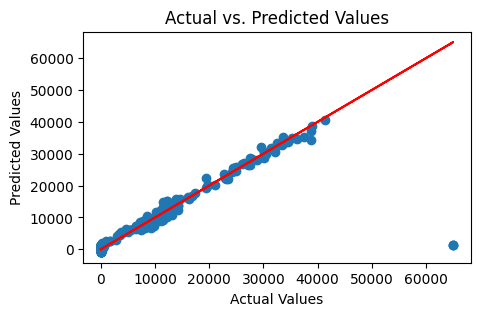

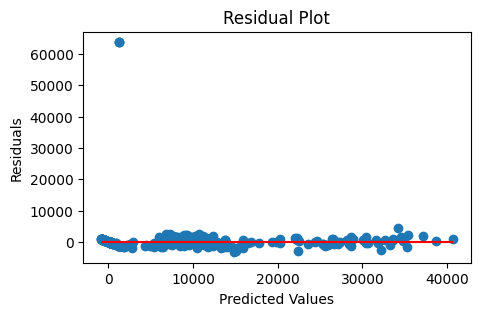

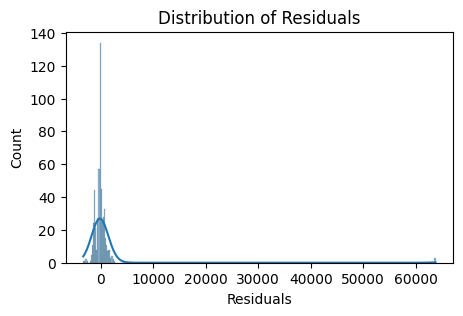

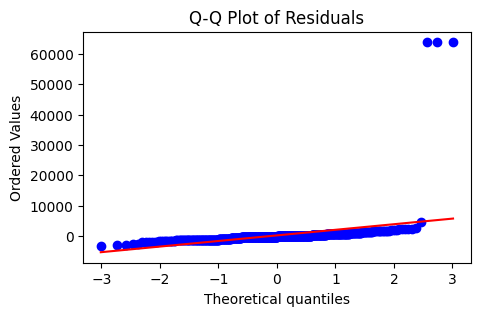

In [50]:
# residuals, predict vs actuals, qq plots for LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression



# Training a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting values for the testing set
y_pred = model.predict(X_test)

# Plotting Actual vs. Predicted Values
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')  # Ideal line where predicted values equal actual values
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Calculating residuals
residuals = y_test - y_pred

# Plotting Residuals
plt.figure(figsize=(5, 3))
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(5, 3))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

# Q-Q Plot of Residuals
plt.figure(figsize=(5, 3))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [52]:
#Run the model on a selection of the data


def predict_total_power_draw(df, model):
    """
    Applies a trained Linear Regression model to predict 'TotalPowerDraw' on a new dataset.

    Parameters:
 df_hourly_numeric (DataFrame or ndarray): The original dataset containing the independent variables.
    model (LinearRegression): The trained Linear Regression model.

    Returns:
    ndarray: Predicted values for 'TotalPowerDraw'.
    """

    # Check if orig_data is a DataFrame or ndarray and select features accordingly
    if isinstance(df, pd.DataFrame):
        # If orig_data is a DataFrame, ensure it contains the same features as X_train
        features = df[X_train.columns] if 'X_train' in globals() or 'X_train' in locals() else df
    elif isinstance(df, np.ndarray):
        # If orig_data is an ndarray, assume it's already structured correctly
        features = df
    else:
        raise ValueError("orig_data must be a pandas DataFrame or a numpy ndarray.")

    # Use the model to make predictions on the provided features
    predictions = model.predict(features)

    return predictions

# Example usage:
# predictions = predict_total_power_draw(orig_data, model)


HOW TO APPLY THE MODEL ON THE ORIGINAL DATASET????

In [53]:
df

,Vdatetime,datetime,BatSOC,ThrottlePerc,RearAxle1,H2Weight,MotorRPM,MotorTorque,MotorTemp,BattOutputPower,...,TotalPowerDraw,DayOfWeek,AirTemp,Is_Friday,Is_Monday,Is_Saturday,Is_Sunday,Is_Thursday,Is_Tuesday,Is_Wednesday
0,2022-08-01 04,2022-08-01 04:59:59.880000+00:00,87.733572,94.314217,7108.281063,6241.840427,32.226553,251.142921,40.973181,17290.052132,...,13713.046695,Monday,20.6,0,1,0,0,0,0,0
1,2022-08-01 05,2022-08-01 05:59:59.990000+00:00,81.852431,68.168056,8580.659722,6637.344792,10.728542,119.177014,50.915306,15929.268472,...,9444.155245,Monday,20.6,0,1,0,0,0,0,0
2,2022-08-01 06,2022-08-01 06:59:59.870000+00:00,54.056532,98.022640,7776.109452,5644.733940,37.581013,235.988194,56.864547,16360.531741,...,12075.898738,Monday,20.6,0,1,0,0,0,0,0
3,2022-08-01 07,2022-08-01 07:59:59.820000+00:00,46.348187,213.243523,8328.226385,6329.168194,212.520287,445.930969,72.886717,18460.976244,...,40680.984837,Monday,20.6,0,1,0,0,0,0,0
4,2022-08-01 08,2022-08-01 08:59:59.940000+00:00,24.638125,47.125000,3179.993056,2554.907153,28.368542,71.331042,70.815041,-16121.872074,...,5412.054734,Monday,20.6,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,2023-04-29 12,2023-04-29 12:59:59.840000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0
2663,2023-04-29 13,2023-04-29 13:59:59.830000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0
2664,2023-04-29 14,2023-04-29 14:59:59.840000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0
2665,2023-04-29 15,2023-04-29 15:59:59.920000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0


In [55]:
#Apply the model on the original data

import pandas as pd

# Assuming 'df', 'model', and 'X_train' are already defined


feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else ["BatSOC", "ThrottlePerc", "RearAxle1", "H2Weight", "MotorRPM", "MotorTemp", "BattOutputPower", "TotalFCPower", "MotorPowerDraw", "ActualSpeed", "AirTemp"]

# Selecting the relevant features from the new dataframe
X_new = df[feature_names]

# Drop the nans
X_new_cleaned = X_new.dropna()

# Making predictions
y_new_pred = model.predict(X_new_cleaned)

# Insert predictions into the cleaned DataFrame
X_new_cleaned['Predicted_TotalPowerDraw'] = y_new_pred

# If you want to merge the predictions back into the original DataFrame, use an identifier or index to merge on
# Assuming df_hourly_numeric and X_new_cleaned share a common index or identifier that survived the dropna
# For simplicity, if the index is maintained, you can reindex or merge based on the index

df_with_predictions = df.merge(X_new_cleaned[['Predicted_TotalPowerDraw']], how='left', left_index=True, right_index=True)

# Now df_hourly_numeric_with_predictions contains the original data plus a new column with predicted values where available, NaNs elsewhere


In [60]:
selected_columns_TPD = df_with_predictions[['datetime', 'TotalPowerDraw', 'Predicted_TotalPowerDraw']]

In [61]:
selected_columns_TPD

,datetime,TotalPowerDraw,Predicted_TotalPowerDraw
0,2022-08-01 04:59:59.880000+00:00,13713.046695,12038.183790
1,2022-08-01 05:59:59.990000+00:00,9444.155245,7075.281959
2,2022-08-01 06:59:59.870000+00:00,12075.898738,12800.784284
3,2022-08-01 07:59:59.820000+00:00,40680.984837,38460.482501
4,2022-08-01 08:59:59.940000+00:00,5412.054734,6293.307767
...,...,...,...
2662,2023-04-29 12:59:59.840000+00:00,0.000000,1247.869079
2663,2023-04-29 13:59:59.830000+00:00,0.000000,1247.869111
2664,2023-04-29 14:59:59.840000+00:00,0.000000,1247.869111
2665,2023-04-29 15:59:59.920000+00:00,0.000000,1247.869111
